## 『本次練習內容』
#### 運用這幾天所學觀念搭建一個CNN分類器

## 『本次練習目的』
  #### 熟悉CNN分類器搭建步驟與原理
  #### 學員們可以嘗試不同搭法，如使用不同的Maxpooling層，用GlobalAveragePooling取代Flatten等等

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.datasets import cifar10
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder


In [2]:
config = tf.compat.v1.ConfigProto(gpu_options=tf.compat.v1.GPUOptions(allow_growth=True))
config.gpu_options.per_process_gpu_memory_fraction = 0.85  #占用85%显存
session = tf.compat.v1.Session(config=config)

In [10]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape) #(50000, 32, 32, 3)

## Normalize Data
def normalize(X_train,X_test):
        mean = np.mean(X_train,axis=(0,1,2,3))
        std = np.std(X_train, axis=(0, 1, 2, 3))
        X_train = (X_train-mean)/(std+1e-7)
        X_test = (X_test-mean)/(std+1e-7) 
        return X_train, X_test,mean,std
    
    
## Normalize Training and Testset    
x_train, x_test,mean_train,std_train = normalize(x_train, x_test) 

(50000, 32, 32, 3)


In [4]:
## OneHot Label 由(None, 1)-(None, 10)
## ex. label=2,變成[0,0,1,0,0,0,0,0,0,0]
one_hot=OneHotEncoder()
y_train=one_hot.fit_transform(y_train).toarray()
y_test=one_hot.transform(y_test).toarray()

In [5]:
classifier=Sequential()
input_shape=(32,32,3)#卷積組合
classifier.add(Convolution2D(32,3,3,input_shape=(32,32,3),activation='relu'))#32,3,3,input_shape=(32,32,3),activation='relu''
classifier.add(BatchNormalization(momentum=0.9, epsilon=1e-06))

'''自己決定MaxPooling2D放在哪裡'''
#classifier.add(MaxPooling2D(pool_size=(2,2)))

#卷積組合
classifier.add(Convolution2D(32,3,3))
classifier.add(BatchNormalization(momentum=0.9, epsilon=1e-06))

#flatten
classifier.add(Flatten())

#FC
classifier.add(Dense(100,activation='relu')) 
#output_dim=100,activation=relu

#輸出
classifier.add(Dense(10,activation='softmax'))

#超過兩個就要選categorical_crossentrophy
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
classifier.fit(x_train,y_train,batch_size=100,epochs=100)

Epoch 1/100
500/500 [==============================] - 4s 3ms/step - loss: 1.8001 - accuracy: 0.3642: 0s - loss: 1.8526 - ac
Epoch 2/100
500/500 [==============================] - 1s 3ms/step - loss: 1.3350 - accuracy: 0.5279
Epoch 3/100
500/500 [==============================] - 1s 3ms/step - loss: 1.1727 - accuracy: 0.5843
Epoch 4/100
500/500 [==============================] - 1s 3ms/step - loss: 1.0867 - accuracy: 0.6158
Epoch 5/100
500/500 [==============================] - 1s 3ms/step - loss: 1.0227 - accuracy: 0.6422
Epoch 6/100
500/500 [==============================] - 1s 3ms/step - loss: 0.9532 - accuracy: 0.6658
Epoch 7/100
500/500 [==============================] - 1s 3ms/step - loss: 0.9086 - accuracy: 0.6834
Epoch 8/100
500/500 [==============================] - 2s 3ms/step - loss: 0.8742 - accuracy: 0.6904
Epoch 9/100
500/500 [==============================] - 1s 3ms/step - loss: 0.8287 - accuracy: 0.7116
Epoch 10/100
500/500 [==============================] - 1s 3ms/step

500/500 [==============================] - 1s 3ms/step - loss: 0.2160 - accuracy: 0.9226
Epoch 81/100
500/500 [==============================] - 1s 3ms/step - loss: 0.2133 - accuracy: 0.9227
Epoch 82/100
500/500 [==============================] - 1s 3ms/step - loss: 0.2101 - accuracy: 0.9241
Epoch 83/100
500/500 [==============================] - 1s 3ms/step - loss: 0.2094 - accuracy: 0.9243
Epoch 84/100
500/500 [==============================] - 1s 3ms/step - loss: 0.2080 - accuracy: 0.9259
Epoch 85/100
500/500 [==============================] - 1s 3ms/step - loss: 0.2068 - accuracy: 0.9251
Epoch 86/100
500/500 [==============================] - 1s 3ms/step - loss: 0.2079 - accuracy: 0.9249
Epoch 87/100
500/500 [==============================] - 1s 3ms/step - loss: 0.2069 - accuracy: 0.9269
Epoch 88/100
500/500 [==============================] - 1s 3ms/step - loss: 0.1980 - accuracy: 0.9282
Epoch 89/100
500/500 [==============================] - 1s 3ms/step - loss: 0.2014 - accuracy: 

## 預測新圖片，輸入影像前處理要與訓練時相同
#### ((X-mean)/(std+1e-7) ):這裡的mean跟std是訓練集的
## 維度如下方示範

In [6]:
input_example=(np.zeros(shape=(1,32,32,3))-mean_train)/(std_train+1e-7) 
classifier.predict(input_example)

array([[3.62643376e-02, 1.05696035e-10, 1.41704381e-01, 7.95071840e-01,
        2.12968756e-02, 1.60756244e-05, 5.40113251e-04, 5.10547450e-03,
        9.43926921e-07, 2.70089398e-12]], dtype=float32)

Text(0.5, 1.0, 'label predict: airplane')

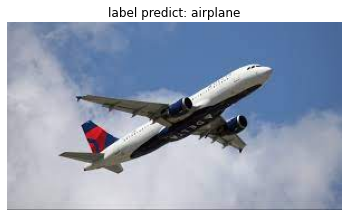

In [40]:
import cv2
import matplotlib.pyplot as plt
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}
image = cv2.imread('airplane.jpg')
image1 = cv2.resize(image, (32, 32), interpolation=cv2.INTER_AREA)
image2 = tf.reshape(image1, [-1, 32, 32,3])
result_hot=classifier.predict(image2)
plt.imshow(image[:,:,[2,1,0]])
plt.axis('off')
plt.title('label predict: {}'.format(label_dict[np.argmax(result_hot, axis=1)[0]][:]))